# Tema2

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import chi2_contingency
from itertools import combinations
from sklearn.impute import SimpleImputer
from sklearn import preprocessing

In [3]:
D_train = pd.read_csv('Diabet_train.csv')
D_test = pd.read_csv('Diabet_test.csv')
D_full = pd.read_csv('Diabet_full.csv')

# EDA

* Numerical Attributes

In [4]:
columns_numeric = ['psychological-rating','BodyMassIndex','Age','CognitionScore','Body_Stats','Metabolical_Rate']
numeric_attributes = D_full[columns_numeric]
tabel = numeric_attributes.describe()
tabel

,psychological-rating,BodyMassIndex,Age,CognitionScore,Body_Stats,Metabolical_Rate
count,10000.000000,10000.000000,10000.0000,10000.000000,10000.000000,9000.000000
mean,4.365100,28.246500,8.0575,3.125300,194.960784,221.592499
std,8.891103,6.462563,3.0363,7.308607,82.438106,60.480951
min,0.000000,14.000000,1.0000,0.000000,105.063984,71.602207
25%,0.000000,24.000000,6.0000,0.000000,156.720671,180.542314
50%,0.000000,27.000000,8.0000,0.000000,174.042100,224.218817
75%,3.000000,31.000000,10.0000,2.000000,197.742249,262.688901
max,30.000000,92.000000,13.0000,30.000000,553.000000,327.936098


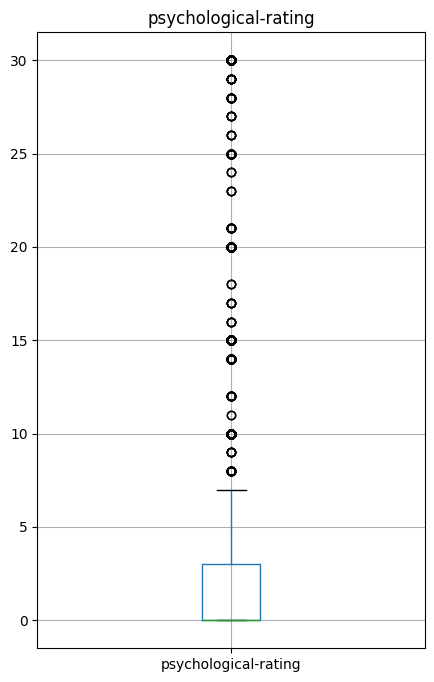

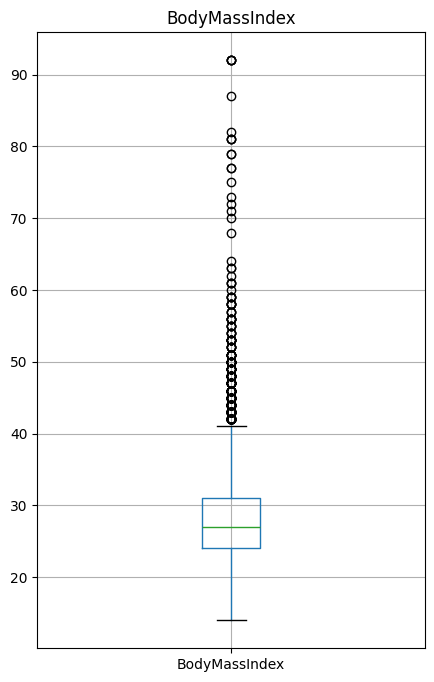

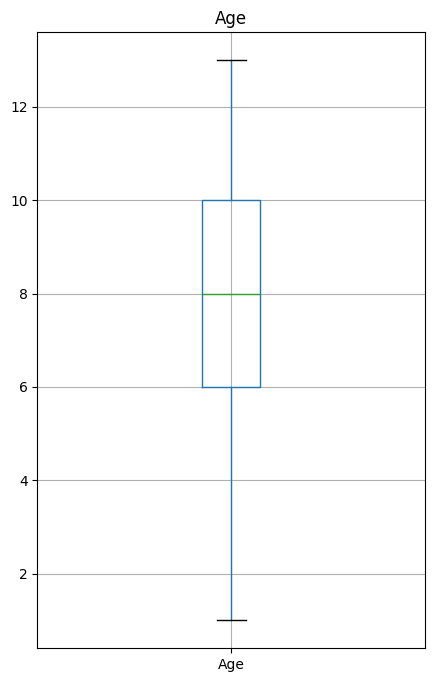

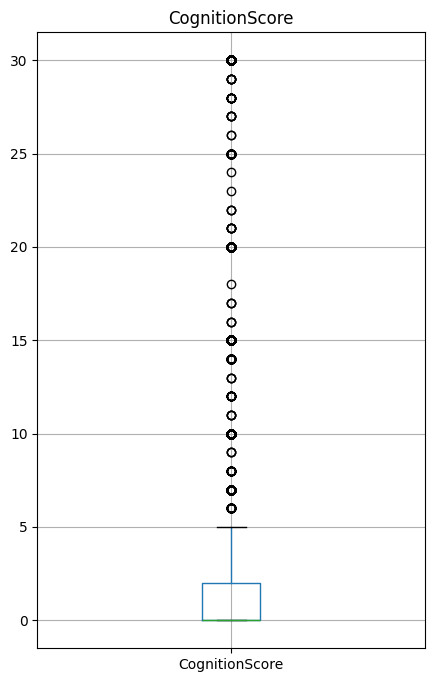

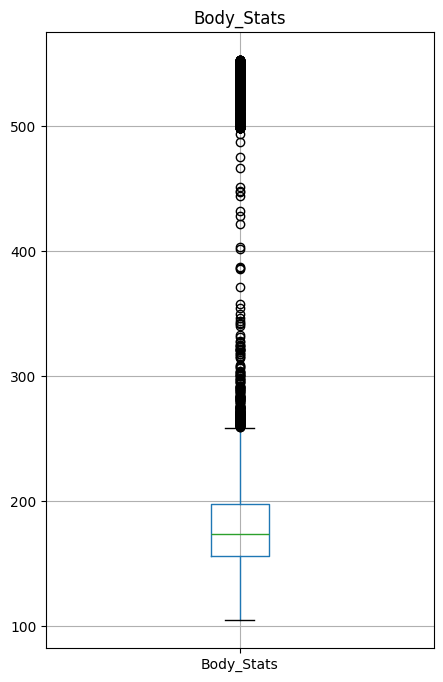

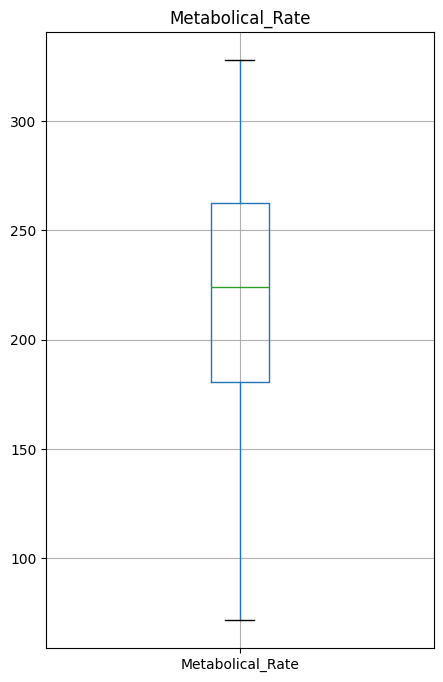

In [5]:
for column in numeric_attributes.columns:
    plt.figure(figsize=(5, 8))
    boxplot = numeric_attributes.boxplot(column=column)
    plt.title(column)
    plt.show()

* Discret Attributes

In [6]:
columns_to_drop = ['Diabetes', 'psychological-rating', 'BodyMassIndex', 'Age', 'CognitionScore', 'Body_Stats', 'Metabolical_Rate']
columns_discret = D_full.drop(columns=columns_to_drop)
discret_attributes = columns_discret
tabel_full =discret_attributes.describe()

# creeaza un tabel
summary_table = pd.DataFrame({
    'Attribute': discret_attributes.columns,
    'Non-missing Count': discret_attributes.count().values,
    'Unique Values Count': discret_attributes.nunique().values
})
summary_table


,Attribute,Non-missing Count,Unique Values Count
0,HealthcareInterest,10000,2
1,PreCVA,10000,2
2,RoutineChecks,10000,2
3,CompletedEduLvl,9000,6
4,alcoholAbuse,10000,2
5,cholesterol_ver,10000,2
6,vegetables,10000,2
7,HighBP,10000,2
8,Unprocessed_fructose,10000,2
9,Jogging,10000,2


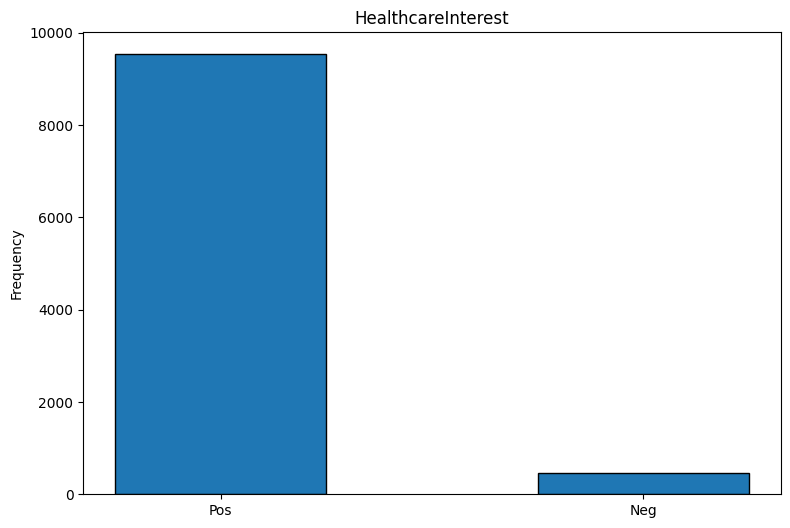

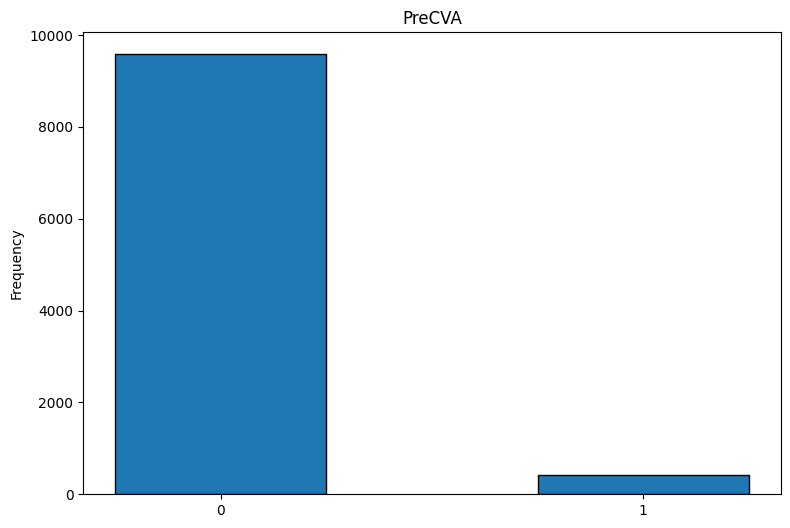

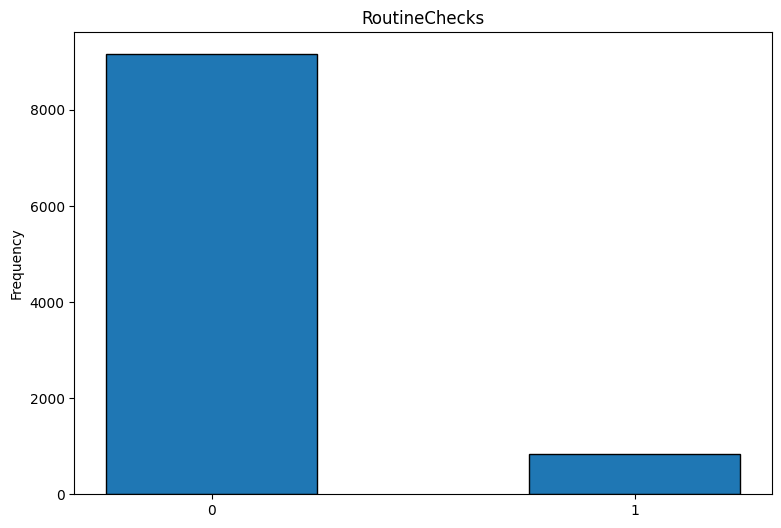

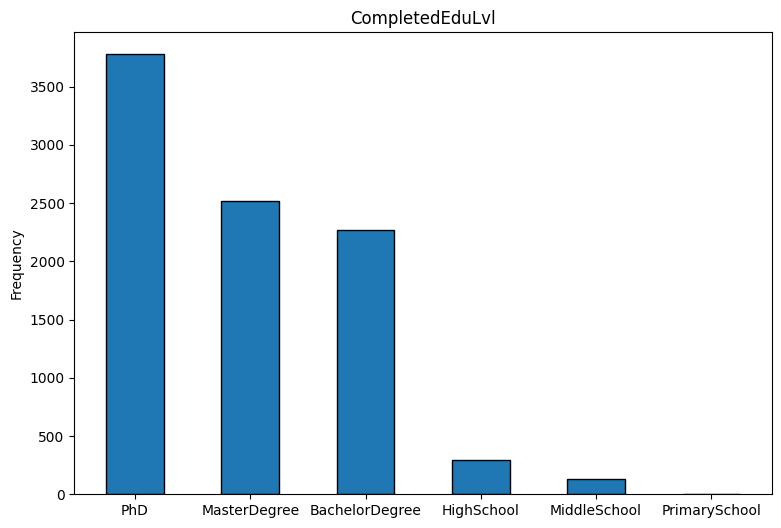

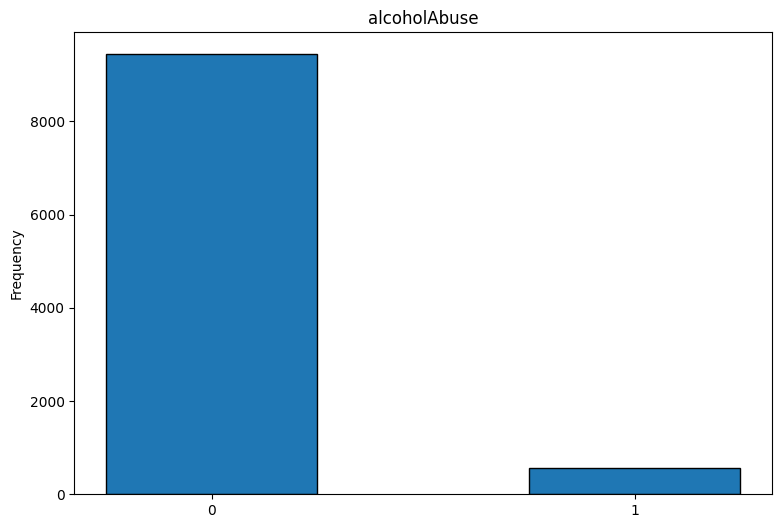

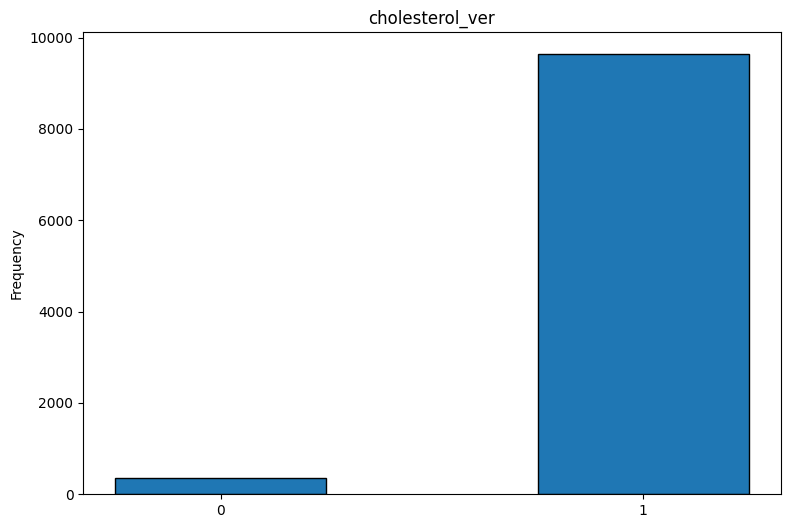

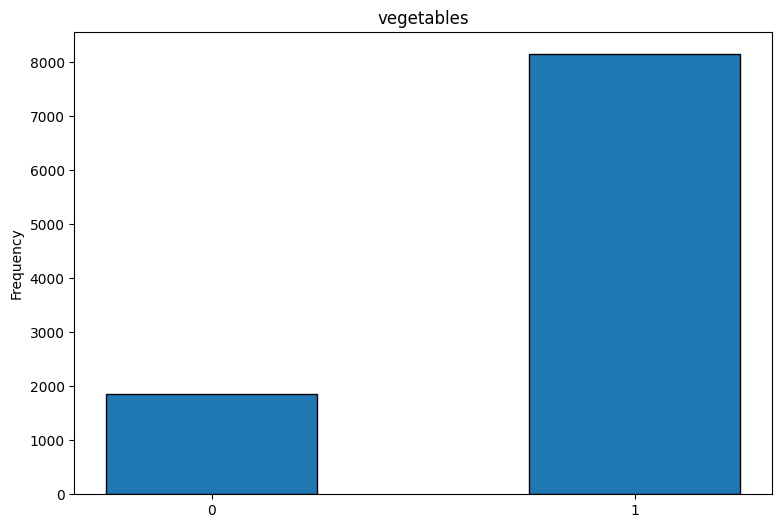

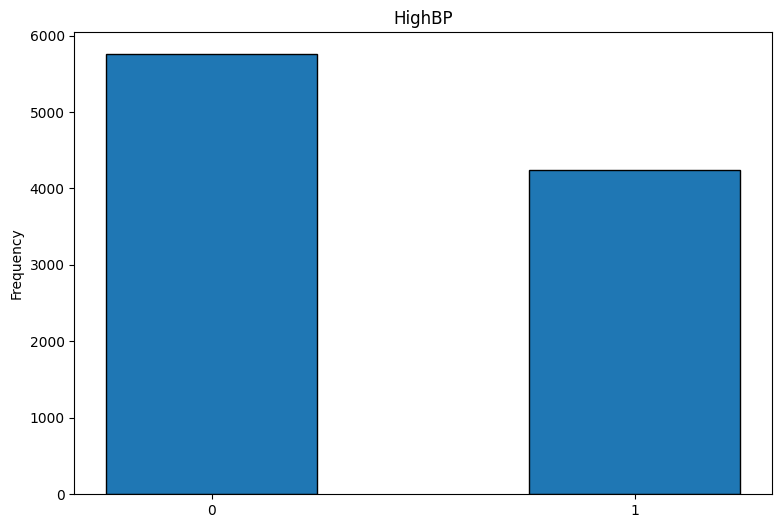

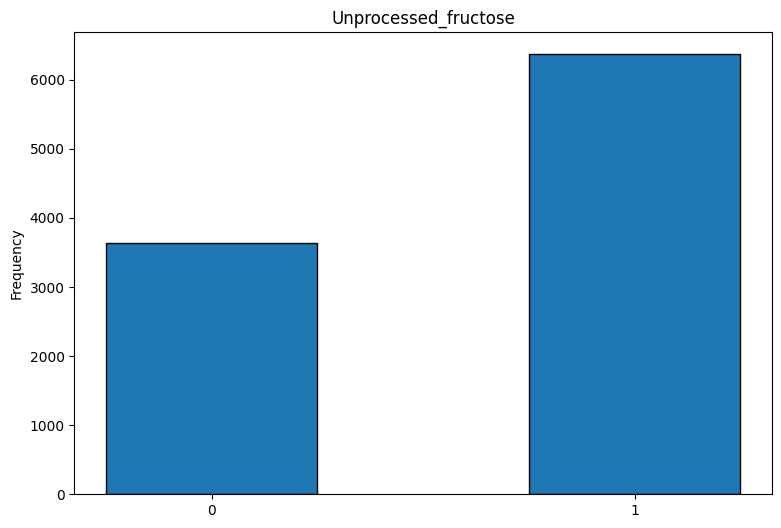

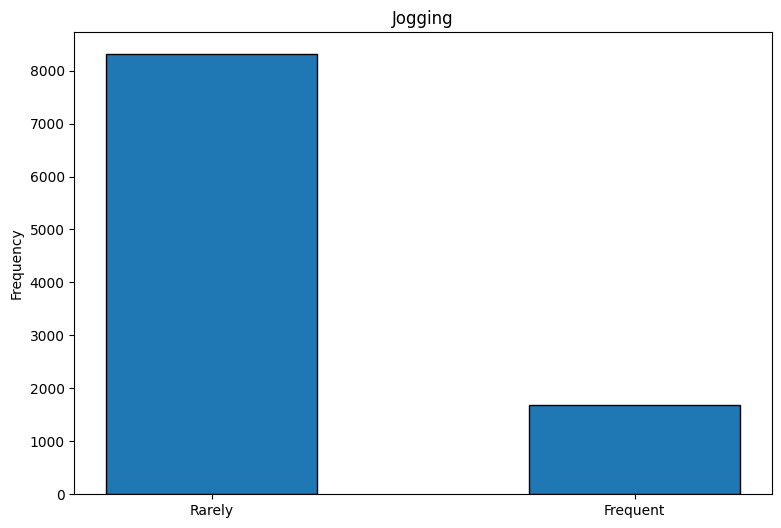

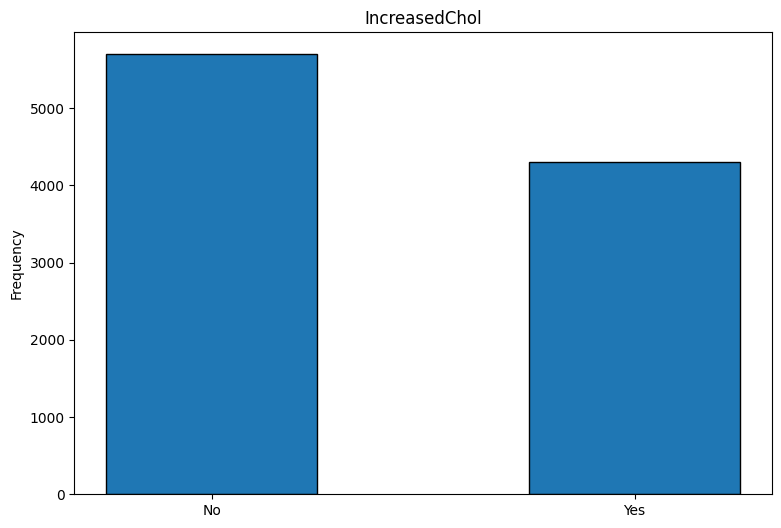

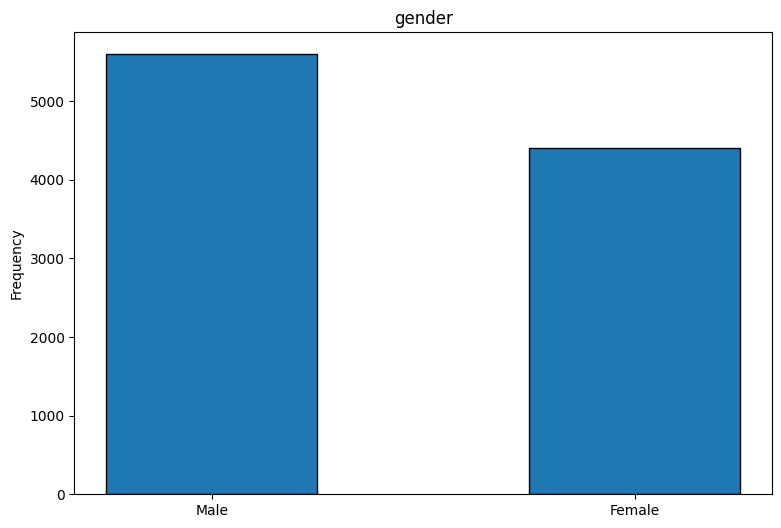

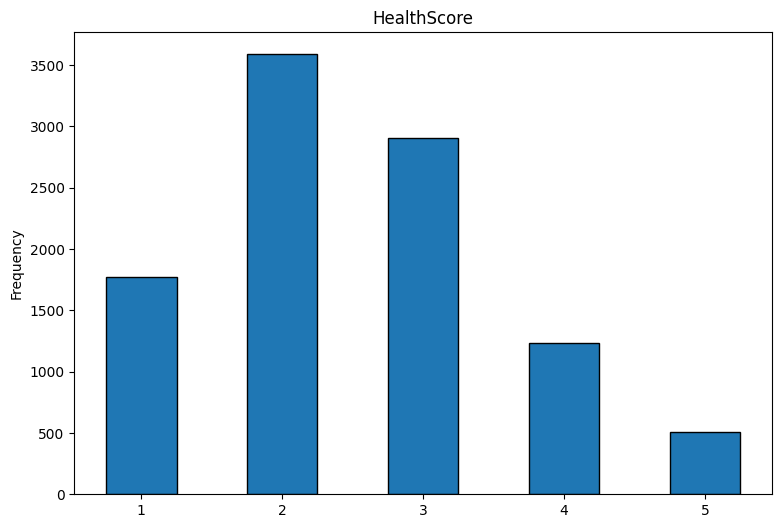

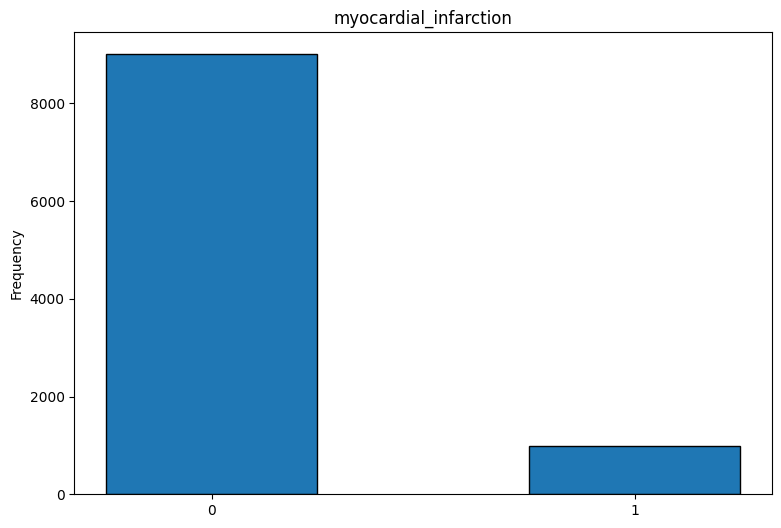

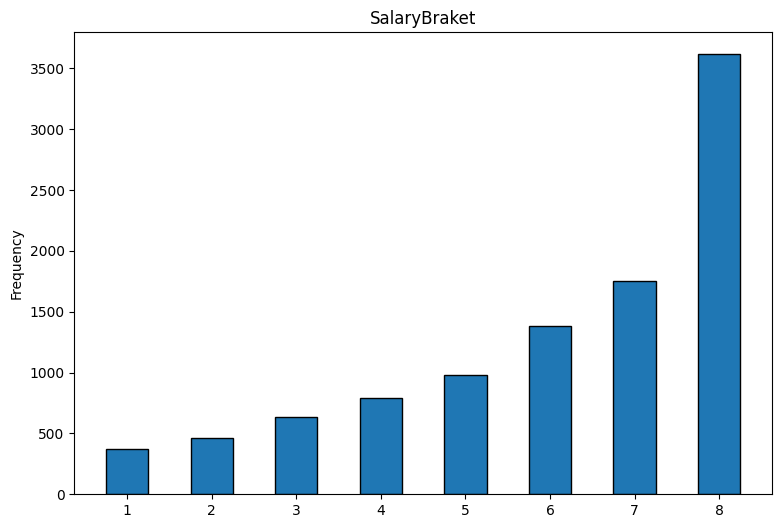

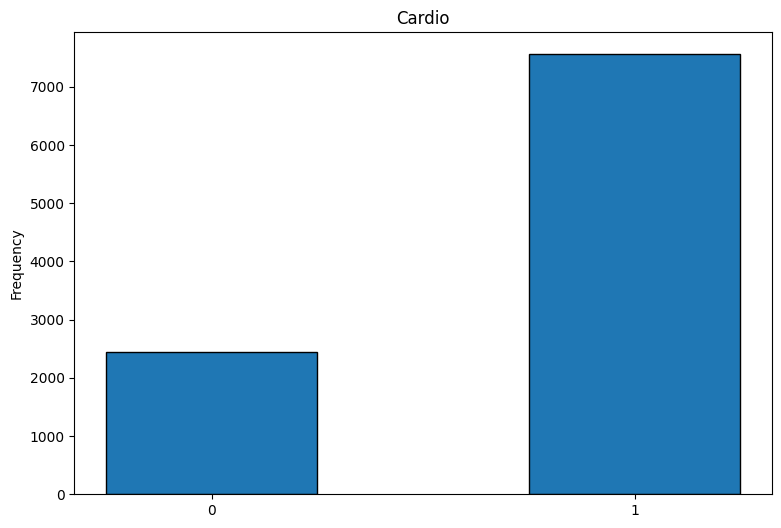

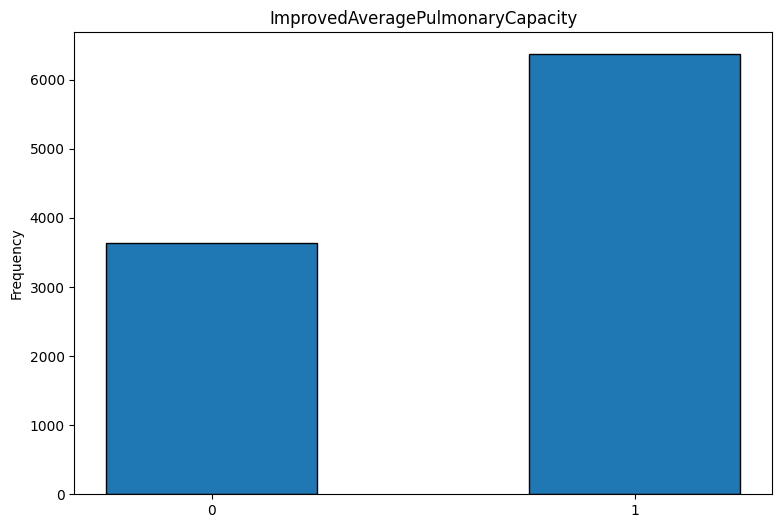

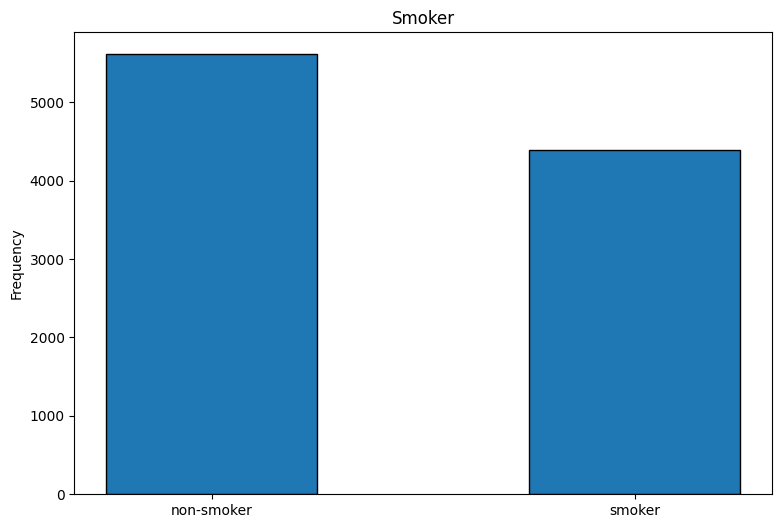

In [34]:
for column in discret_attributes.columns:
    freq = discret_attributes[column].value_counts()
    valori = freq.index.tolist()
    frecventa_valori = freq.tolist() 
    plt.figure(figsize=(9,6))
    plt.bar(valori, frecventa_valori, width=0.5, align='center', edgecolor='black')
    plt.xticks(valori)
    plt.title(column)
    plt.ylabel('Frequency')
    plt.show()

# Class balance analysis

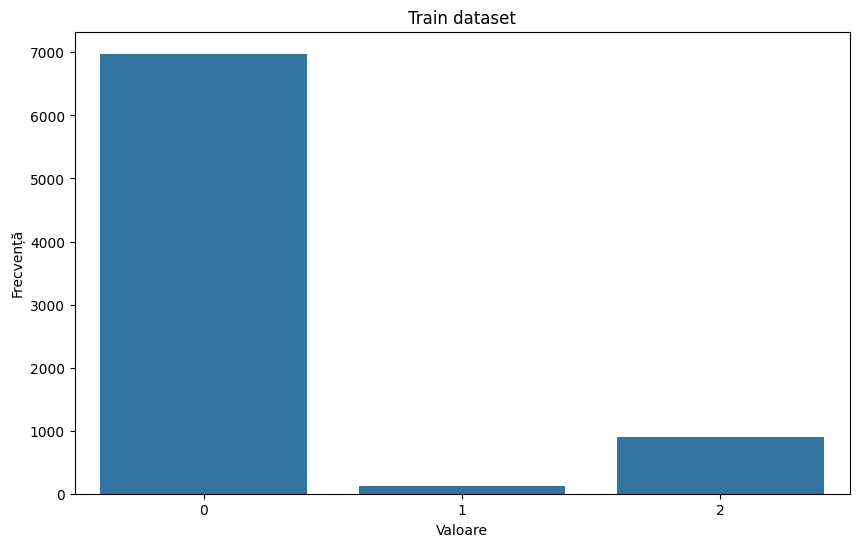

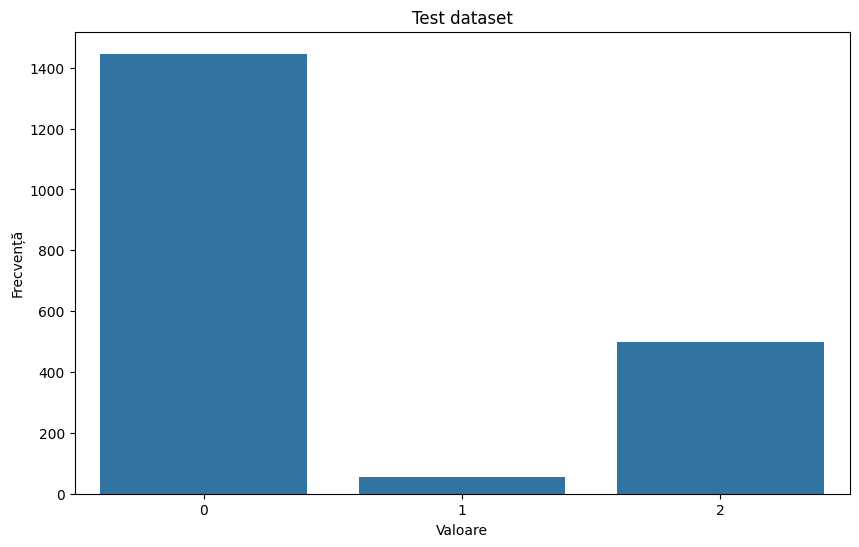

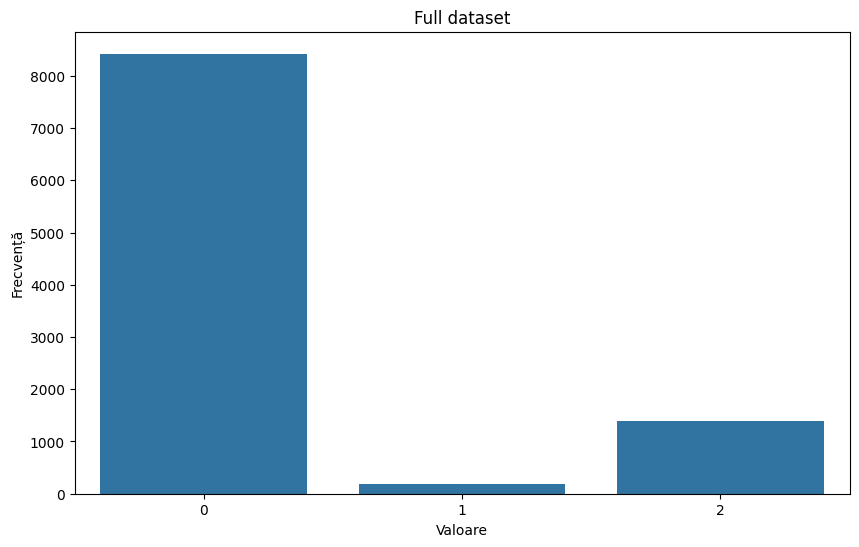

In [8]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Diabetes', data=D_train)
plt.title('Train dataset')
plt.xlabel('Valoare')
plt.ylabel('Frecvență')
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(x='Diabetes', data=D_test)
plt.title('Test dataset')
plt.xlabel('Valoare')
plt.ylabel('Frecvență')
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(x='Diabetes', data=D_full)
plt.title('Full dataset')
plt.xlabel('Valoare')
plt.ylabel('Frecvență')
plt.show()


# Correlation analysis between attributes

* Numerical

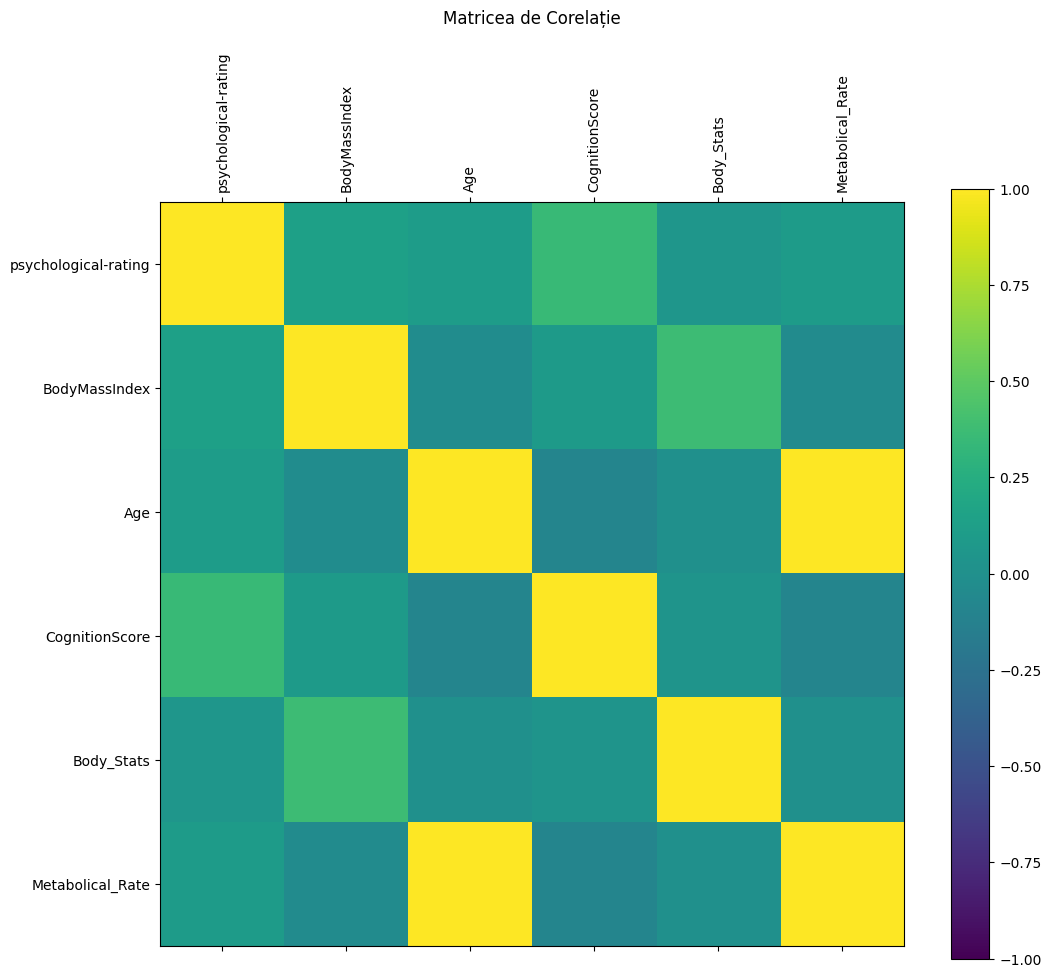

In [9]:
correlation_matrix = numeric_attributes.corr(method='pearson')

fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111)
cax = ax.matshow(correlation_matrix, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,6,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(correlation_matrix.columns, rotation=90)
ax.set_yticklabels(correlation_matrix.columns)


plt.title('Matricea de Corelație', pad=20)
plt.show()

* Discret

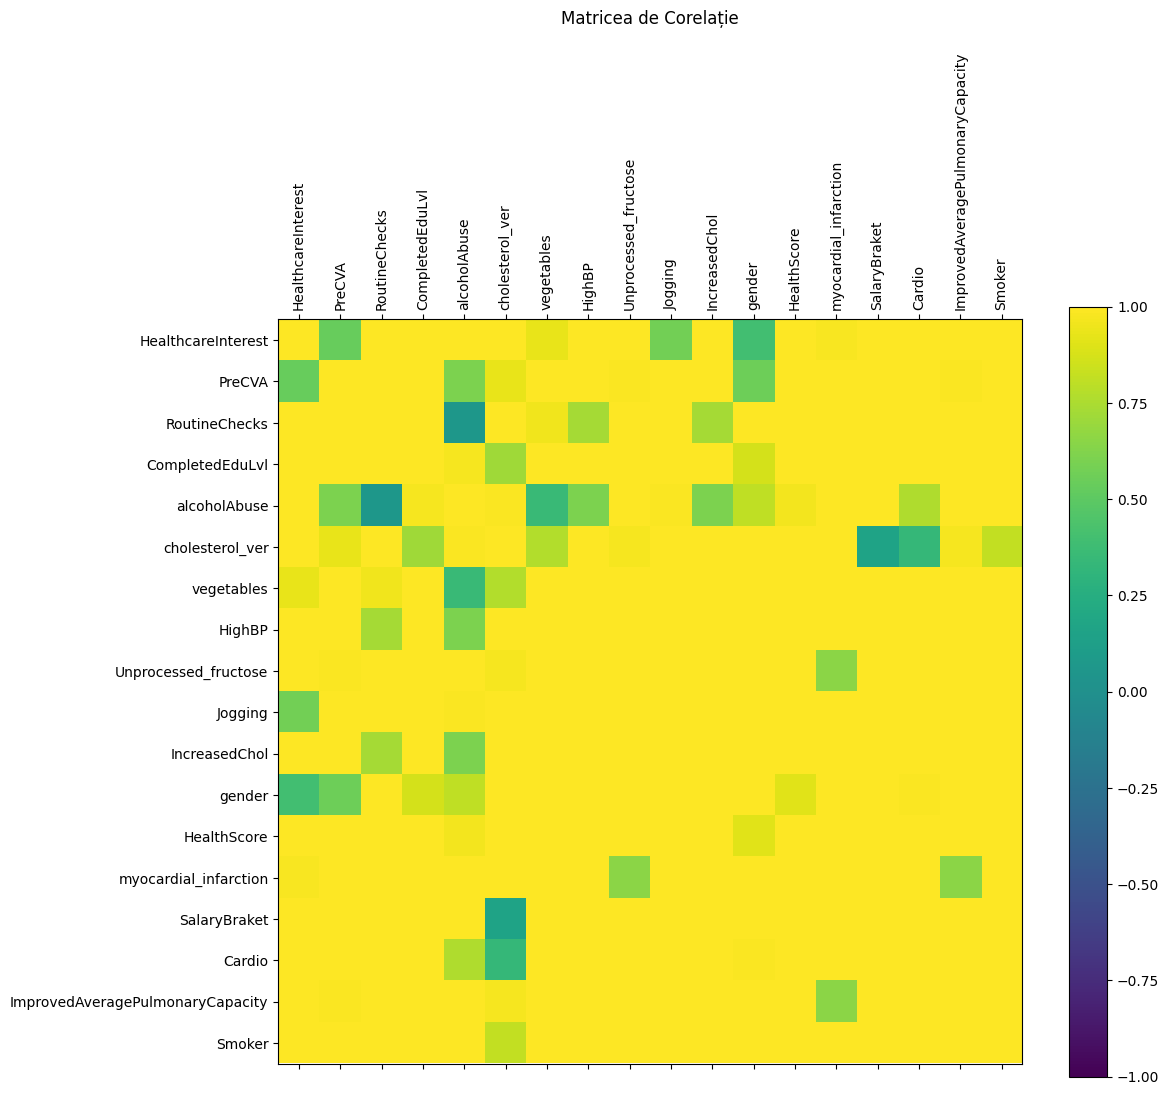

In [10]:
correlation_matrix = np.zeros((len(discret_attributes.columns), len(discret_attributes.columns)))
correlation_matrix = pd.DataFrame(correlation_matrix,index=discret_attributes.columns, columns=discret_attributes.columns)
pairs = combinations(discret_attributes.columns, 2)
for col1, col2 in pairs:
    CrosstabResult=pd.crosstab(index=D_full[col1],columns=D_full[col2])
    ChiSqResult = chi2_contingency(CrosstabResult)
    correlation_matrix.loc[col1, col2] = 1 - ChiSqResult[1]
    correlation_matrix.loc[col2, col1] = 1 - ChiSqResult[1]
    correlation_matrix.loc[col1, col1] = 1
    correlation_matrix.loc[col2, col2] = 1



fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111)
cax = ax.matshow(correlation_matrix, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,18,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(correlation_matrix.columns, rotation=90)
ax.set_yticklabels(correlation_matrix.columns)

plt.title('Matricea de Corelație', pad=20)
plt.show()


# Data Preprocessing

* Missing data for an attribute in a sample

In [35]:
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(D_train[columns_numeric])
imputer.fit(D_test[columns_numeric])
D_train[columns_numeric] = imputer.transform(D_train[columns_numeric])
D_test[columns_numeric] = imputer.transform(D_test[columns_numeric])
D_full[columns_numeric] = imputer.transform(D_full[columns_numeric])

imp = SimpleImputer(strategy="most_frequent")
D_train[discret_attributes.columns] = imp.fit_transform(D_train[discret_attributes.columns])
D_test[discret_attributes.columns] = imp.fit_transform(D_test[discret_attributes.columns])
D_full[discret_attributes.columns] = imp.fit_transform(D_full[discret_attributes.columns])


In [12]:
D_test

,psychological-rating,HealthcareInterest,BodyMassIndex,PreCVA,RoutineChecks,Age,CompletedEduLvl,CognitionScore,alcoholAbuse,cholesterol_ver,...,gender,HealthScore,myocardial_infarction,SalaryBraket,Cardio,Body_Stats,ImprovedAveragePulmonaryCapacity,Metabolical_Rate,Smoker,Diabetes
0,0.0,Pos,32.0,0,0,11.0,PhD,0.0,0,1,...,Female,3,0,7,1,499.000000,0,280.240999,non-smoker,2
1,0.0,Pos,33.0,0,0,7.0,MasterDegree,0.0,0,1,...,Female,2,0,8,1,198.166377,1,195.659866,non-smoker,0
2,10.0,Neg,31.0,0,0,8.0,PhD,1.0,0,1,...,Male,2,0,1,0,183.370010,0,213.030211,smoker,0
3,30.0,Pos,27.0,0,0,11.0,PhD,0.0,0,1,...,Female,4,1,6,1,174.688776,0,284.384246,smoker,2
4,0.0,Pos,22.0,0,0,2.0,MasterDegree,0.0,0,1,...,Male,2,0,7,1,147.528153,1,106.414102,non-smoker,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0.0,Pos,27.0,0,0,7.0,PhD,0.0,0,1,...,Male,2,0,6,1,170.144801,1,201.661701,non-smoker,0
1996,0.0,Pos,25.0,0,0,10.0,MasterDegree,0.0,0,1,...,Female,4,0,6,1,156.045558,1,257.370461,smoker,2
1997,0.0,Neg,23.0,0,0,1.0,BachelorDegree,0.0,0,1,...,Female,1,0,5,0,145.851409,1,76.811239,smoker,0
1998,2.0,Pos,21.0,0,0,1.0,PhD,3.0,0,1,...,Female,3,0,5,1,142.567213,1,82.543047,non-smoker,0


In [13]:
D_train

,psychological-rating,HealthcareInterest,BodyMassIndex,PreCVA,RoutineChecks,Age,CompletedEduLvl,CognitionScore,alcoholAbuse,cholesterol_ver,...,gender,HealthScore,myocardial_infarction,SalaryBraket,Cardio,Body_Stats,ImprovedAveragePulmonaryCapacity,Metabolical_Rate,Smoker,Diabetes
0,0.0,Pos,33.0,0,1,9.0,PhD,0.0,0,1,...,Female,4,0,8,1,198.117966,0,240.219569,non-smoker,2
1,30.0,Pos,26.0,0,0,7.0,PhD,0.0,0,1,...,Female,2,0,8,1,155.956269,1,200.630748,non-smoker,0
2,0.0,Pos,31.0,0,0,11.0,BachelorDegree,0.0,0,1,...,Male,2,0,6,0,190.916913,1,277.374260,non-smoker,0
3,0.0,Pos,46.0,0,0,6.0,BachelorDegree,0.0,0,1,...,Female,3,0,8,1,265.753475,0,176.226402,smoker,1
4,0.0,Pos,24.0,0,0,13.0,PhD,5.0,0,1,...,Female,3,0,6,1,162.282836,1,314.327292,non-smoker,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,0.0,Pos,29.0,0,0,10.0,PhD,0.0,0,1,...,Male,3,0,6,1,180.288756,1,257.442868,smoker,2
7996,10.0,Pos,24.0,0,0,13.0,HighSchool,5.0,0,1,...,Male,3,1,2,1,152.430285,1,318.336971,smoker,0
7997,2.0,Pos,20.0,0,0,13.0,BachelorDegree,0.0,0,1,...,Male,2,0,4,1,136.342182,0,318.292861,smoker,0
7998,30.0,Pos,34.0,0,0,10.0,PhD,30.0,0,1,...,Male,5,0,8,1,199.613351,1,252.722052,non-smoker,2



* Extreme values for an attribute in a sample

In [36]:
threshold = 1.5

for column in numeric_attributes.columns:
    Q1 = D_train[column].quantile(0.25)
    Q3 = D_train[column].quantile(0.75)
    IQR = Q3 - Q1
    outliers = D_train[(D_train[column] < (Q1 - threshold * IQR)) | (D_train[column] > (Q3 + threshold * IQR))]
    D_train[column] = D_train[column].drop(outliers.index)

D_train = D_train.reset_index(drop=True)
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(D_train[columns_numeric])
D_train[columns_numeric] = imputer.transform(D_train[columns_numeric])

for column in numeric_attributes.columns:
    Q1 = D_test[column].quantile(0.25)
    Q3 = D_test[column].quantile(0.75)
    IQR = Q3 - Q1
    outliers = D_test[(D_test[column] < (Q1 - threshold * IQR)) | (D_test[column] > (Q3 + threshold * IQR))]
    D_test[column] = D_test[column].drop(outliers.index)

D_test = D_test.reset_index(drop=True)
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(D_test[columns_numeric])
D_test[columns_numeric] = imputer.transform(D_test[columns_numeric])


for column in numeric_attributes.columns:
    Q1 = D_full[column].quantile(0.25)
    Q3 = D_full[column].quantile(0.75)
    IQR = Q3 - Q1
    outliers = D_full[(D_full[column] < (Q1 - threshold * IQR)) | (D_full[column] > (Q3 + threshold * IQR))]
    D_full[column] = D_full[column].drop(outliers.index)

D_full = D_full.reset_index(drop=True)
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(D_full[columns_numeric])
D_full[columns_numeric] = imputer.transform(D_full[columns_numeric])



In [15]:
D_train

,psychological-rating,HealthcareInterest,BodyMassIndex,PreCVA,RoutineChecks,Age,CompletedEduLvl,CognitionScore,alcoholAbuse,cholesterol_ver,...,gender,HealthScore,myocardial_infarction,SalaryBraket,Cardio,Body_Stats,ImprovedAveragePulmonaryCapacity,Metabolical_Rate,Smoker,Diabetes
0,0.000000,Pos,33.000000,0,1,9.0,PhD,0.00000,0,1,...,Female,4,0,8,1,198.117966,0,240.219569,non-smoker,2
1,0.718834,Pos,26.000000,0,0,7.0,PhD,0.00000,0,1,...,Female,2,0,8,1,155.956269,1,200.630748,non-smoker,0
2,0.000000,Pos,31.000000,0,0,11.0,BachelorDegree,0.00000,0,1,...,Male,2,0,6,0,190.916913,1,277.374260,non-smoker,0
3,0.000000,Pos,27.397801,0,0,6.0,BachelorDegree,0.00000,0,1,...,Female,3,0,8,1,174.185037,0,176.226402,smoker,1
4,0.000000,Pos,24.000000,0,0,13.0,PhD,5.00000,0,1,...,Female,3,0,6,1,162.282836,1,314.327292,non-smoker,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,0.000000,Pos,29.000000,0,0,10.0,PhD,0.00000,0,1,...,Male,3,0,6,1,180.288756,1,257.442868,smoker,2
7996,0.718834,Pos,24.000000,0,0,13.0,HighSchool,5.00000,0,1,...,Male,3,1,2,1,152.430285,1,318.336971,smoker,0
7997,2.000000,Pos,20.000000,0,0,13.0,BachelorDegree,0.00000,0,1,...,Male,2,0,4,1,136.342182,0,318.292861,smoker,0
7998,0.718834,Pos,34.000000,0,0,10.0,PhD,0.52537,0,1,...,Male,5,0,8,1,199.613351,1,252.722052,non-smoker,2


In [16]:
D_test

,psychological-rating,HealthcareInterest,BodyMassIndex,PreCVA,RoutineChecks,Age,CompletedEduLvl,CognitionScore,alcoholAbuse,cholesterol_ver,...,gender,HealthScore,myocardial_infarction,SalaryBraket,Cardio,Body_Stats,ImprovedAveragePulmonaryCapacity,Metabolical_Rate,Smoker,Diabetes
0,0.000000,Pos,32.0,0,0,11.0,PhD,0.0,0,1,...,Female,3,0,7,1,177.678428,0,280.240999,non-smoker,2
1,0.000000,Pos,33.0,0,0,7.0,MasterDegree,0.0,0,1,...,Female,2,0,8,1,198.166377,1,195.659866,non-smoker,0
2,10.000000,Neg,31.0,0,0,8.0,PhD,1.0,0,1,...,Male,2,0,1,0,183.370010,0,213.030211,smoker,0
3,1.070091,Pos,27.0,0,0,11.0,PhD,0.0,0,1,...,Female,4,1,6,1,174.688776,0,284.384246,smoker,2
4,0.000000,Pos,22.0,0,0,2.0,MasterDegree,0.0,0,1,...,Male,2,0,7,1,147.528153,1,106.414102,non-smoker,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0.000000,Pos,27.0,0,0,7.0,PhD,0.0,0,1,...,Male,2,0,6,1,170.144801,1,201.661701,non-smoker,0
1996,0.000000,Pos,25.0,0,0,10.0,MasterDegree,0.0,0,1,...,Female,4,0,6,1,156.045558,1,257.370461,smoker,2
1997,0.000000,Neg,23.0,0,0,1.0,BachelorDegree,0.0,0,1,...,Female,1,0,5,0,145.851409,1,76.811239,smoker,0
1998,2.000000,Pos,21.0,0,0,1.0,PhD,3.0,0,1,...,Female,3,0,5,1,142.567213,1,82.543047,non-smoker,0


* Redundant attributes

Prin analiza matricei de corelatie pentru atributele numerice se poate observa ca atributul Age este puternic corelat cu atributul Metabolical_Rate. Astfel,
se poate renunta la unul dintre ele.

Prin analiza matricei de corelatie pentru atributele discrete,desi p ul este foarte mic,aceasta spune doar ca atributele nu sunt independente. Datorita testerii in alogitmii de mai jos, am decis sa nu elimin nici un atribut discret

* Value ranges of different sizes for numeric attributes

In [37]:
scaler = preprocessing.StandardScaler().fit(D_train[numeric_attributes.columns])
D_train[numeric_attributes.columns] = scaler.transform(D_train[numeric_attributes.columns])

scaler = preprocessing.StandardScaler().fit(D_test[numeric_attributes.columns])
D_test[numeric_attributes.columns] = scaler.transform(D_test[numeric_attributes.columns])

scaler = preprocessing.StandardScaler().fit(D_full[numeric_attributes.columns])
D_full[numeric_attributes.columns] = scaler.transform(D_full[numeric_attributes.columns])

In [18]:
D_test[numeric_attributes.columns]

,psychological-rating,BodyMassIndex,Age,CognitionScore,Body_Stats,Metabolical_Rate
0,-0.507961,0.709689,0.927176,-0.475512,0.000000,0.928562
1,-0.507961,0.896303,-0.440088,-0.475512,0.744998,-0.514910
2,4.238933,0.523075,-0.098272,0.367123,0.206961,-0.218466
3,0.000000,-0.223381,0.927176,-0.475512,-0.108712,0.999271
4,-0.507961,-1.156452,-2.149168,-0.475512,-1.096346,-2.037989
...,...,...,...,...,...,...
1995,-0.507961,-0.223381,-0.440088,-0.475512,-0.273943,-0.412482
1996,-0.507961,-0.596610,0.585360,-0.475512,-0.786630,0.538250
1997,-0.507961,-0.969838,-2.490984,-0.475512,-1.157317,-2.543195
1998,0.441418,-1.343066,-2.490984,2.052392,-1.276739,-2.445376


In [19]:
D_train[numeric_attributes.columns]

,psychological-rating,BodyMassIndex,Age,CognitionScore,Body_Stats,Metabolical_Rate
0,-0.494242,1.152994,0.326747,-0.451372,0.932431,0.335836
1,0.000000,-0.287683,-0.326747,-0.451372,-0.710196,-0.358187
2,-0.494242,0.741372,0.980240,-0.451372,0.651877,0.987188
3,-0.494242,0.000000,-0.653494,-0.451372,0.000000,-0.786015
4,-0.494242,-0.699304,1.633734,3.844381,-0.463712,1.635004
...,...,...,...,...,...,...
7995,-0.494242,0.329750,0.653494,-0.451372,0.237802,0.637774
7996,0.000000,-0.699304,1.633734,3.844381,-0.847569,1.705297
7997,0.880881,-1.522548,1.633734,-0.451372,-1.474364,1.704523
7998,0.000000,1.358805,0.653494,0.000000,0.990691,0.555015


# Random Forest

* Scikit-Learn implementation

In [20]:
def plot_confusion_matrix(y_pred: pd.Series, y_true: pd.Series):
    """
    Construiește matricea de confuzie pentru un clasificator.

    Args:
        y_pred (pd.Series):
            Clasele prezise de clasificator
        y_true (pd.Series):
            Clasele reale din setul de date
    """
    confusion_matrix = pd.crosstab(y_true, y_pred, rownames=['Actual'], colnames=['Predicted'], dropna=False)

    # Adăugăm toate clasele prezise și reale pentru a avea toate clasele în matricea de confuzie
    all_classes = np.unique(list(y_true) + list(y_pred))
    confusion_matrix = confusion_matrix.reindex(index=all_classes, columns=all_classes, fill_value=0)

    print(confusion_matrix)

    plt.figure(figsize=(10,7))
    sns.heatmap(confusion_matrix, annot=True, fmt='d')
    plt.xlabel('Predicted')
    plt.ylabel('Truth')
    plt.show()

Test:
Accuracy 0.639
              precision    recall  f1-score   support

           0       0.89      0.66      0.76      1446
           1       0.04      0.19      0.07        54
           2       0.46      0.63      0.53       500

    accuracy                           0.64      2000
   macro avg       0.46      0.49      0.45      2000
weighted avg       0.76      0.64      0.68      2000

Predicted    0    1    2
Actual                  
0          952  149  345
1           17   10   27
2          104   80  316


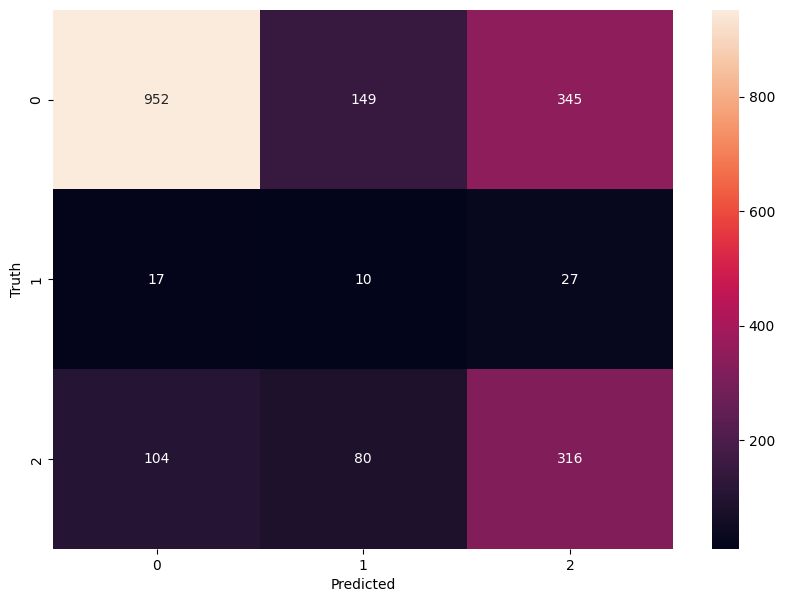

Train:
              precision    recall  f1-score   support

           0       0.66      0.95      0.78      4860
           1       0.36      0.05      0.08       984
           2       0.65      0.27      0.38      2156

    accuracy                           0.66      8000
   macro avg       0.56      0.42      0.41      8000
weighted avg       0.62      0.66      0.59      8000

Predicted     0    1     2
Actual                    
0          4630  812  1536
1            41   46    42
2           189  126   578


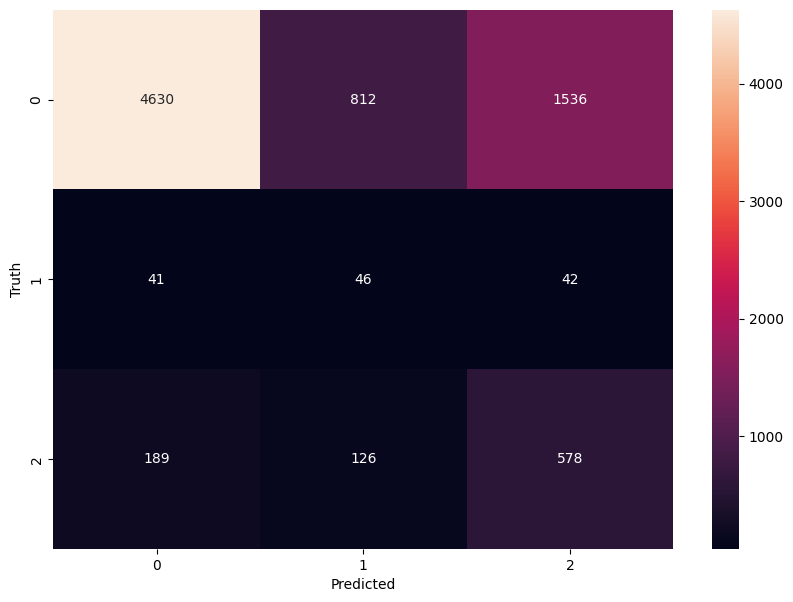

FULL
              precision    recall  f1-score   support

           0       0.67      0.94      0.78      5972
           1       0.31      0.05      0.08      1210
           2       0.64      0.32      0.42      2818

    accuracy                           0.66     10000
   macro avg       0.54      0.43      0.43     10000
weighted avg       0.62      0.66      0.59     10000

Predicted     0    1     2
Actual                    
0          5618  944  1862
1            59   57    67
2           295  209   889


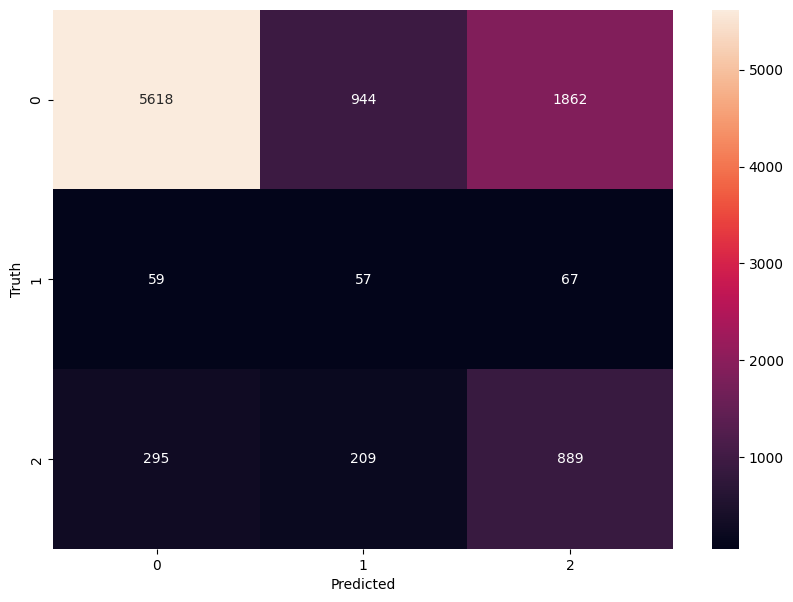

In [503]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import RandomizedSearchCV 

numeric_columns = ['psychological-rating','BodyMassIndex','Age','CognitionScore','Body_Stats']
categorical_columns = discret_attributes.columns.tolist()
y_train = D_train['Diabetes']
x_train = D_train[numeric_columns + categorical_columns]
y_test = D_test['Diabetes']
x_test = D_test[numeric_columns + categorical_columns]
x_FUll = D_full[numeric_columns + categorical_columns]
y_Full = D_full['Diabetes']

X_train_encoded = pd.get_dummies(x_train,dtype='float64')
X_test_encoded = pd.get_dummies(x_test,dtype='float64')
X_full_encoded = pd.get_dummies(x_FUll,dtype='float64')

X_train_encoded = X_train_encoded.reindex(columns=X_test_encoded.columns, fill_value=0)
X_test_encoded = X_test_encoded.reindex(columns=X_train_encoded.columns, fill_value=0)
X_full_encoded = X_full_encoded.reindex(columns=X_train_encoded.columns, fill_value=0)

# param_grid = { 
#     'n_estimators': [200, 400, 600, 800, 1000],
#     'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100,110,120, None],
#     'max_leaf_nodes': [3, 6, 9, 12,15,18,21,25,30,40,50,60,70,80,90,100, None], 
#     'criterion': ['gini', 'entropy','log_loss'],
#     'class_weight': ['balanced', 'balanced_subsample'],
# } 
# random_search = RandomizedSearchCV(RandomForestClassifier(), 
# param_grid, n_iter=10, cv=3,verbose=2, scoring='f1') 
# random_search.fit(X_train_encoded, y_train) 
# print(random_search.best_estimator_) 


sklearn_random_forest = RandomForestClassifier(n_estimators=100, max_depth=15,min_samples_leaf = 50,max_leaf_nodes=5, criterion='gini', class_weight='balanced')
sklearn_random_forest.fit(X_train_encoded, y_train)
print("Test:")
y_pred = sklearn_random_forest.predict(X_test_encoded)
print("Accuracy",accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
plot_confusion_matrix(y_pred, y_test)
print("Train:")
y_train_pred = sklearn_random_forest.predict(X_train_encoded)
print(classification_report(y_train_pred, y_train))
plot_confusion_matrix(y_train_pred, y_train)
print("FULL")
y_full_pred = sklearn_random_forest.predict(X_full_encoded)
print(classification_report(y_full_pred, y_Full))
plot_confusion_matrix(y_full_pred, y_Full)






* Random Forest Implementation

In [22]:
from typing import Optional
from typing import Dict

class DecisionTreeNode:
    def __init__(self, 
                 feature: Optional[str] = None, 
                 children: Optional[Dict[str, 'DecisionTreeNode']] = None, 
                 label: Optional[str] = None):
        self.split_feature = feature
        self.children = children if (children is not None and feature is not None) else {}
        self.label = label
        self.depth = 1
        self.score = 0
        self.num_samples = 0

In [23]:
import math
from copy import deepcopy
from typing import Callable
class DecisionTree:
    def __init__(self,
                 class_weight: str = 'balanced',
                 max_depth: int = np.inf,
                 min_samples_per_node: int = 1):
        self._root: DecisionTreeNode | None = None 
        self._max_depth: int = max_depth
        self._min_samples_per_node: int = min_samples_per_node
        self.__class_weight:str = class_weight


    @staticmethod
    def most_frequent_class(y: pd.Series) -> str:
        most_frequent = y.mode()[0]
        return most_frequent


    @staticmethod
    def compute_entropy(y: pd.Series) -> float:
        entropy = 0
        class_counts = y.value_counts()
        total_samples = len(y)

        for count in class_counts:
            probability = count / total_samples
            entropy -= probability * math.log2(probability)

        return entropy



    @staticmethod
    def information_gain(groups, y):
        initial_entropy = DecisionTree.compute_entropy(y)
        n_instances = float(sum(len(group) for group in groups))
        final_entropy = 0.0
        for group in groups:
            size = float(len(group))
            if size == 0:
                continue
            subset_y = [row[-1] for row in group]
            subset_entropy = DecisionTree.compute_entropy(subset_y)
            subset_weight = size / n_instances
            final_entropy += subset_weight * subset_entropy
        information_gain = initial_entropy - final_entropy
        return information_gain

    
    @staticmethod
    def gini_index(groups, y,weighted_y):
        n_instances = float(sum(len(group) for group in groups))
        gini = 0.0
        for group in groups:
            size = float(len(group))
            if size == 0:
                continue
            score = 0.0
            group_labels = y[group.index]
            class_counts = group_labels.value_counts(normalize=True)
            for index,p in class_counts.items():
                score += p * p * weighted_y[index] 
            gini += (1.0 - score) * (size / n_instances)
        return gini


    
    
    @staticmethod
    def get_split(X: pd.DataFrame, y: pd.Series, attribute_list: list[str],weighted_y):
        b_index, b_value, b_score, b_groups = 999, 999, 999, None
        for index in attribute_list:
            attribute_values = X[index].values
            for value in np.unique(attribute_values):
                left_indices = np.where(attribute_values < value)[0]
                right_indices = np.where(attribute_values >= value)[0]
                left_group, right_group = X.iloc[left_indices], X.iloc[right_indices]
                groups = (left_group, right_group)
                gini = DecisionTree.gini_index(groups, y,weighted_y)

                if gini < b_score:
                    b_index, b_value, b_score, b_groups = index, value, gini, groups
        
        return b_index


    def _generate_tree(self,
                       parent_node: DecisionTreeNode | None,
                       X: pd.DataFrame,
                       y: pd.Series,
                       feature_list: list[str],
                       select_feature_func: Callable[[pd.DataFrame, pd.Series, list[str]], str]) -> DecisionTreeNode:
        feature_list = deepcopy(feature_list)
        node = DecisionTreeNode()
        node.depth = parent_node.depth + 1 if parent_node is not None else 0
        node.score = DecisionTree.compute_entropy(y)
        node.num_samples = len(y)
        node.label = DecisionTree.most_frequent_class(y)
        if (len(feature_list) == 0 or
            node.depth >= self._max_depth or
            node.num_samples < self._min_samples_per_node or
            y.nunique() == 1):
            return node
        split_feature =DecisionTree.get_split(X, y, feature_list,self.weighted_y)
        feature_list.remove(split_feature)
        node.split_feature = split_feature
        for value in X[split_feature].unique():
            subset_X = X[X[split_feature] == value]
            subset_y = y[X[split_feature] == value]
            subtree = self._generate_tree(node, subset_X, subset_y, feature_list, select_feature_func)
            node.children[value] = subtree
        return node

    def apply_class_weight(self, y):
            class_counts = np.bincount(y)
            n_samples = len(y)
            n_classes = len(class_counts)
            weights = n_samples / (n_classes * class_counts)
            return weights
    

    def fit(self, X: pd.DataFrame, y: pd.Series):
        self.weighted_y = self.apply_class_weight(y)
        self._root = self._generate_tree(parent_node=None,
                                         X=X,
                                         y=y,
                                         feature_list=X.columns.tolist(),
                                        select_feature_func=DecisionTree.get_split)

    def _predict_once(self, x: pd.Series) -> str:
        node = self._root
        while node.split_feature is not None:
            if node.split_feature in x and x[node.split_feature] in node.children:
                node = node.children[x[node.split_feature]]
            else:
                break
        return node.label

    def predict(self, X: pd.DataFrame) -> np.ndarray:
        return np.array([self._predict_once(x) for _, x in X.iterrows()])


In [24]:
from collections import Counter
class RandomForest:

    def __init__(self,
                 n_estimators: int = 100,
                 max_depth: int = 3,
                 min_samples_per_node: int = 1,
                 class_weight: str = 'balanced',
                 subset_size_ratio: float = 0.5,
                 subset_feature_ratio: float = 0.75):
        assert 0 < subset_size_ratio <= 1, "subset_size_ratio must be between 0 and 1"
        assert 0 < subset_feature_ratio <= 1, "subset_feature_ratio must be between 0 and 1"
        self._trees: list[DecisionTree] = []
        self._n_estimators: int = n_estimators
        self._max_depth: int = max_depth
        self._min_samples_per_node: int = min_samples_per_node
        self._class_weight = class_weight
        self._subset_size_ratio: float = subset_size_ratio
        self._subset_feature_ratio: float = subset_feature_ratio

    def fit(self, X: pd.DataFrame, y: pd.Series):
        for _ in range(self._n_estimators):
            indices = np.random.choice(X.shape[0], size=int(self._subset_size_ratio * X.shape[0]), replace=False)
            X_subset = X.iloc[indices]
            y_subset = y.iloc[indices]
            features = np.random.choice(X.columns, size=int(self._subset_feature_ratio * X.shape[1]), replace=False)
            tree = DecisionTree(self._class_weight, self._max_depth, self._min_samples_per_node)
            tree.fit(X_subset[features], y_subset)
            self._trees.append(tree)

    def predict(self, X: pd.DataFrame) -> np.ndarray:
        predictions = []
        for tree in self._trees:
            predictions.append(tree.predict(X))
        return np.array([Counter(pred).most_common(1)[0][0] for pred in np.array(predictions).T])

Accuracy: 0.633
              precision    recall  f1-score   support

           0       0.85      0.63      0.72      1446
           1       1.00      0.00      0.00        54
           2       0.38      0.72      0.50       500

    accuracy                           0.63      2000
   macro avg       0.74      0.45      0.41      2000
weighted avg       0.74      0.63      0.65      2000

Predicted    0  1    2
Actual                
0          908  0  538
1           19  0   35
2          142  0  358


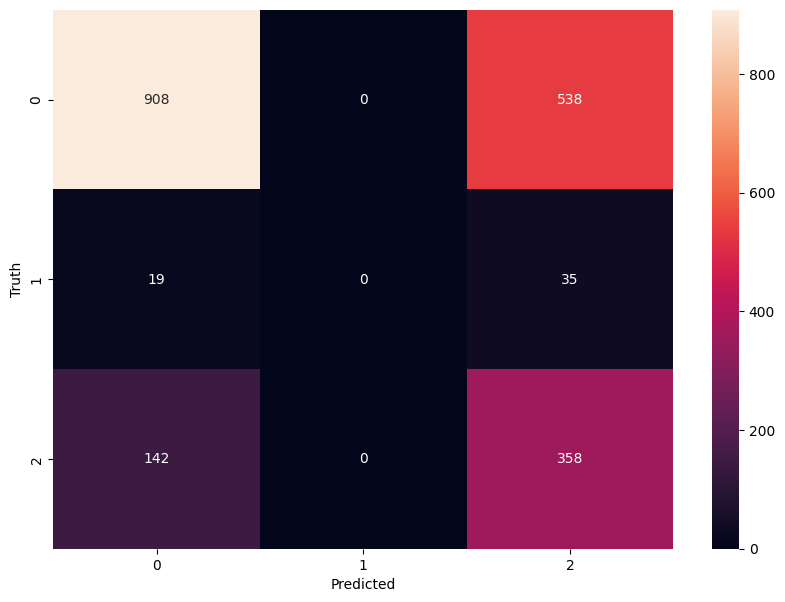

Train:
              precision    recall  f1-score   support

           0       0.72      0.97      0.82      6978
           1       0.95      0.78      0.86      6978
           2       0.89      0.74      0.81      6978

    accuracy                           0.83     20934
   macro avg       0.85      0.83      0.83     20934
weighted avg       0.85      0.83      0.83     20934

Predicted     0     1     2
Actual                     
0          6787    56   135
1          1079  5415   484
2          1611   209  5158


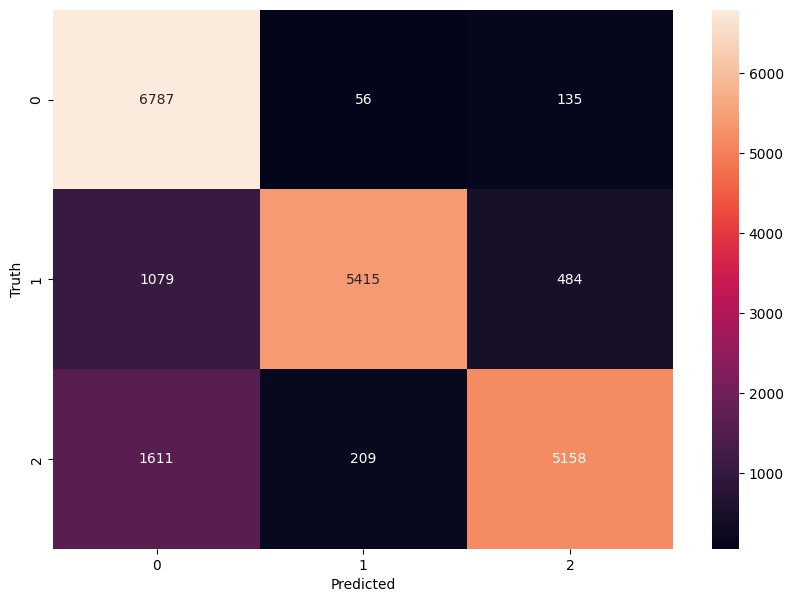

FULL
              precision    recall  f1-score   support

           0       0.63      0.92      0.75      5755
           1       0.00      1.00      0.00         0
           2       0.73      0.24      0.36      4245

    accuracy                           0.63     10000
   macro avg       0.45      0.72      0.37     10000
weighted avg       0.67      0.63      0.58     10000

Predicted     0  1     2
Actual                  
0          5310  0  3114
1            71  0   112
2           374  0  1019


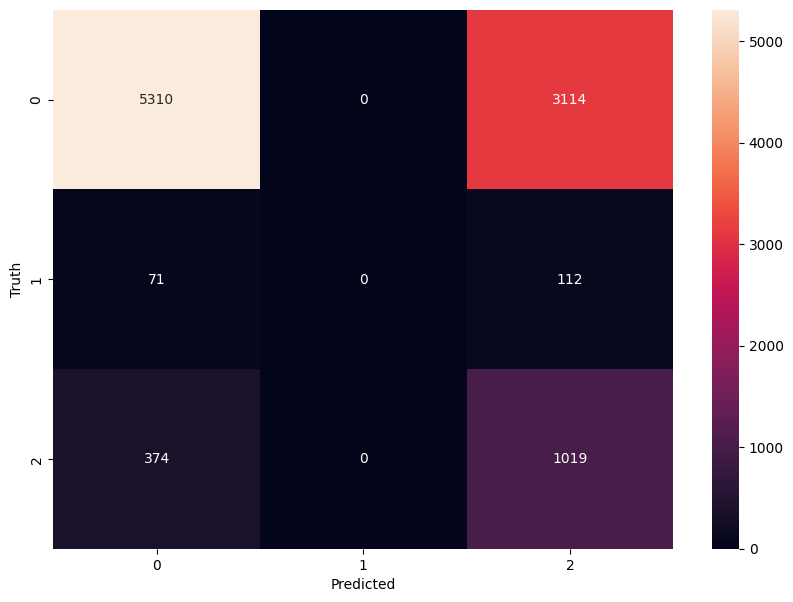

In [521]:
from imblearn.over_sampling import SMOTE

random_forest = RandomForest(n_estimators=10,
                             max_depth=5,
                             min_samples_per_node=31)

smote = SMOTE()
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_encoded, y_train)
random_forest.fit(X_train_resampled, y_train_resampled)
y_pred_rf = random_forest.predict(X_test_encoded)
print('Accuracy:', accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf,zero_division=1))
plot_confusion_matrix(y_pred_rf, y_test)
print("Train:")
y_train_pred_rf = random_forest.predict(X_train_resampled)
print(classification_report(y_train_resampled, y_train_pred_rf,zero_division=1))
plot_confusion_matrix(y_train_pred_rf, y_train_resampled)
print("FULL")
y_full_pred_rf = random_forest.predict(X_full_encoded)
print(classification_report(y_full_pred_rf, y_Full,zero_division=1))
plot_confusion_matrix(y_full_pred_rf, y_Full)




# MLP

* Scikit-Learn implementation

Accuracy: 0.7465
              precision    recall  f1-score   support

           0       0.76      0.96      0.85      1446
           1       1.00      0.00      0.00        54
           2       0.60      0.22      0.32       500

    accuracy                           0.75      2000
   macro avg       0.79      0.39      0.39      2000
weighted avg       0.73      0.75      0.69      2000

Predicted     0  1    2
Actual                 
0          1384  0   62
1            42  0   12
2           391  0  109


C:\Users\iones\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


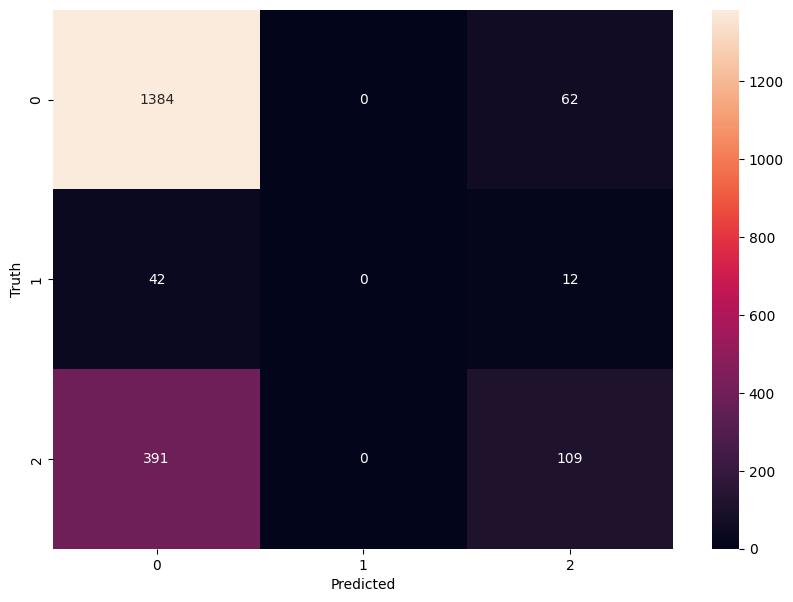

Train:
Predicted     0  1    2
Actual                 
0          6930  0   48
1           102  3   24
2           371  0  522


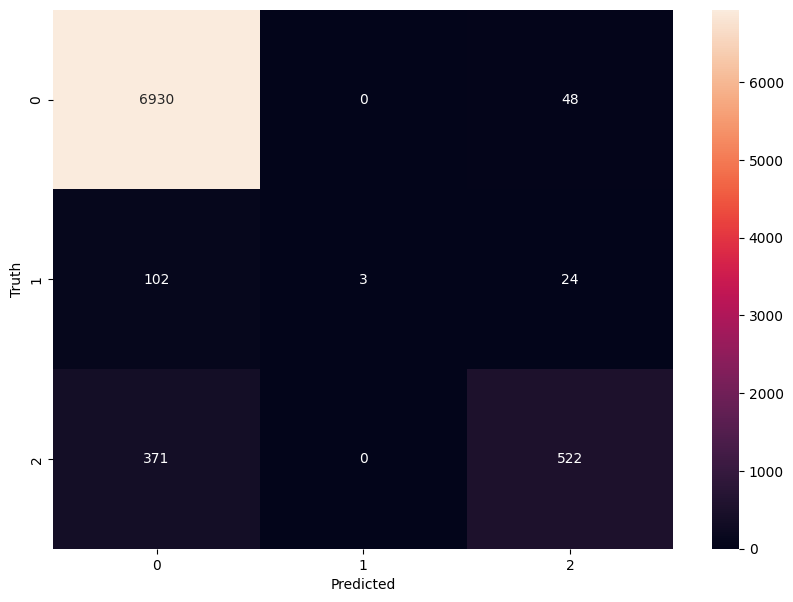

              precision    recall  f1-score   support

           0       0.94      0.99      0.96      6978
           1       1.00      0.02      0.05       129
           2       0.88      0.58      0.70       893

    accuracy                           0.93      8000
   macro avg       0.94      0.53      0.57      8000
weighted avg       0.93      0.93      0.92      8000

FULL
Predicted     0  1    2
Actual                 
0          8160  1  263
1           155  0   28
2           967  1  425


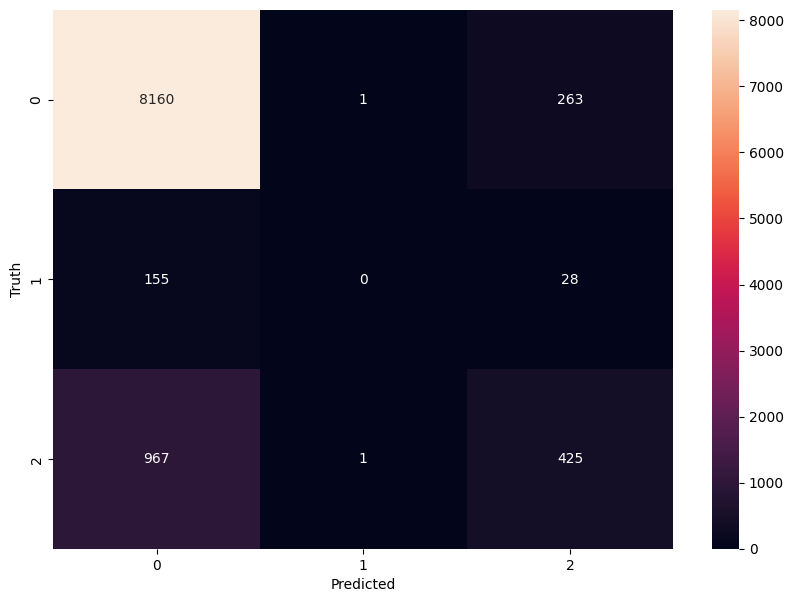

              precision    recall  f1-score   support

           0       0.88      0.97      0.92      8424
           1       0.00      0.00      0.00       183
           2       0.59      0.31      0.40      1393

    accuracy                           0.86     10000
   macro avg       0.49      0.42      0.44     10000
weighted avg       0.82      0.86      0.83     10000



In [519]:
from sklearn.preprocessing import LabelEncoder
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

numeric_columns = ['psychological-rating','BodyMassIndex','Age','CognitionScore','Body_Stats']
categorical_columns = discret_attributes.columns.tolist()

y_train = D_train['Diabetes']
x_train = D_train[numeric_columns + categorical_columns]
y_test = D_test['Diabetes']
x_test = D_test[numeric_columns + categorical_columns]
x_FUll = D_full[numeric_columns + categorical_columns]
y_Full = D_full['Diabetes']

X_train_encoded = pd.get_dummies(x_train,dtype='float64')
X_test_encoded = pd.get_dummies(x_test,dtype='float64')
X_full_encoded = pd.get_dummies(x_FUll,dtype='float64')

X_train_encoded = X_train_encoded.reindex(columns=X_train_encoded.columns, fill_value=0)
X_test_encoded = X_test_encoded.reindex(columns=X_test_encoded.columns, fill_value=0)
X_full_encoded = X_full_encoded.reindex(columns=X_full_encoded.columns, fill_value=0)

LabelEncoder = LabelEncoder()
y_train_encoded = LabelEncoder.fit_transform(y_train)
y_test_encoded = LabelEncoder.fit_transform(y_test)
y_Full = LabelEncoder.fit_transform(y_Full)

# param_grid = {
#     'hidden_layer_sizes': [(50,), (100,), (150,), (200,)],
#     'activation': [ 'relu', 'tanh', 'logistic'],
#     'solver': [ 'sgd', 'adam'],
#     'alpha': [0.001, 0.01],
#     'learning_rate': ['adaptive', 'constant'],
#     'max_iter': [200, 300, 400, 500],
#     'batch_size': [ 32, 64, 128],
# }
# random_search = RandomizedSearchCV(MLPClassifier(), param_grid, cv=3,n_iter=5, verbose=2, scoring='f1')
# random_search.fit(X_train_encoded, y_train_encoded) 
# print(random_search.best_estimator_) 

mlp = MLPClassifier(activation='relu', alpha=0.01, batch_size=32, hidden_layer_sizes=(256,), learning_rate='adaptive', max_iter=500, solver='sgd')
mlp.fit(X_train_encoded, y_train_encoded)

y_pred_mlp = mlp.predict(X_test_encoded)
print('Accuracy:', accuracy_score(y_test_encoded, y_pred_mlp))
print(classification_report(y_test_encoded, y_pred_mlp,zero_division=1))
plot_confusion_matrix(y_pred_mlp, y_test_encoded)
print("Train:")
y_train_pred = mlp.predict(X_train_encoded)
plot_confusion_matrix(y_train_pred, y_train)
print(classification_report(y_train, y_train_pred,zero_division=1))
print("FULL")
y_full_pred = mlp.predict(X_full_encoded)
plot_confusion_matrix(y_full_pred, y_Full)
print(classification_report(y_Full, y_full_pred,zero_division=1))



In [27]:
class Layer:

    def forward(self, x: np.ndarray) -> np.ndarray:
        raise NotImplementedError

    def backward(self, x: np.ndarray, dy: np.ndarray) -> np.ndarray:
        raise NotImplementedError

    def update(self, *args, **kwargs):
        pass  
    

In [28]:
from typing import List
class FeedForwardNetwork:

    def __init__(self, layers: List[Layer]):
        self.layers = layers

    def forward(self, x: np.ndarray, train: bool = True) -> np.ndarray:
        self._inputs = []
        for layer in self.layers:
            if train:
                self._inputs.append(x)
            x = layer.forward(x)
        return x

    def backward(self, dy: np.ndarray) -> np.ndarray:
        for i in reversed(range(len(self.layers))):
            layer = self.layers[i]
            x = self._inputs[i]
            dy = layer.backward(x,dy)
        return dy

    def update(self, *args, **kwargs):
        for layer in self.layers:
            layer.update(*args, **kwargs)

In [29]:
import numpy as np
class Linear(Layer):

    def __init__(self, insize: int, outsize: int) -> None:
        bound = np.sqrt(6. / insize)
        self.weight = np.random.uniform(-bound, bound, (insize, outsize))
        self.bias = np.zeros((outsize,))

        self.dweight = np.zeros_like(self.weight)
        self.dbias = np.zeros_like(self.bias)

    def forward(self, x: np.ndarray) -> np.ndarray:
        return x @ self.weight + self.bias

    def backward(self, x: np.ndarray, dy: np.ndarray) -> np.ndarray:

        self.dweight =  x.T @ dy
        self.dbias = np.sum(dy, axis=0)
        return dy @ self.weight.T

    def update(self, mode='SGD', lr=0.001, mu=0.9):
        if mode == 'SGD':
            self.weight -= lr * self.dweight
            self.bias -= lr * self.dbias
        else:
            raise ValueError('mode should be SGD, not ' + str(mode))

In [30]:
class ReLU(Layer):

    def __init__(self) -> None:
        pass

    def forward(self, x: np.ndarray) -> np.ndarray:
        return np.maximum(x, 0)

    def backward(self, x: np.ndarray, dy: np.ndarray) -> np.ndarray:
         return dy * (x > 0)

In [31]:
class CrossEntropy:

    def __init__(self):
        pass

    def softmax(self, x):
        exps = np.exp(x)
        return exps / np.sum(exps,axis = 0)

    def forward(self, y: np.ndarray, t: np.ndarray) -> float:
        y = self.softmax(y) 
        return -np.mean(np.log(y[np.arange(y.shape[0]), t]))


    def backward(self, y: np.ndarray, t: np.ndarray) -> np.ndarray:
        y = self.softmax(y)
        y[np.arange(y.shape[0]), t] -= 1
        return y / y.shape[0]


In [32]:
def accuracy(y: np.ndarray, t: np.ndarray) -> float:
      return np.mean(np.argmax(y, axis=1) == t)

Epoch 01 | Batch 003 | Train NLL:  6.379 | Train Acc:  28.71% | Test NLL:  7.709 | Test Acc: 33.00%
Epoch 02 | Batch 003 | Train NLL:  6.381 | Train Acc:  33.40% | Test NLL:  7.710 | Test Acc: 37.40%
Epoch 03 | Batch 003 | Train NLL:  6.384 | Train Acc:  38.28% | Test NLL:  7.710 | Test Acc: 42.15%
Epoch 04 | Batch 003 | Train NLL:  6.387 | Train Acc:  44.92% | Test NLL:  7.712 | Test Acc: 47.40%
Epoch 05 | Batch 003 | Train NLL:  6.390 | Train Acc:  52.54% | Test NLL:  7.713 | Test Acc: 52.70%
Epoch 06 | Batch 003 | Train NLL:  6.394 | Train Acc:  58.59% | Test NLL:  7.715 | Test Acc: 56.50%
Epoch 07 | Batch 003 | Train NLL:  6.398 | Train Acc:  66.02% | Test NLL:  7.718 | Test Acc: 61.10%
Epoch 08 | Batch 003 | Train NLL:  6.403 | Train Acc:  72.07% | Test NLL:  7.720 | Test Acc: 65.15%
Epoch 09 | Batch 003 | Train NLL:  6.408 | Train Acc:  75.78% | Test NLL:  7.723 | Test Acc: 67.75%
Epoch 10 | Batch 003 | Train NLL:  6.414 | Train Acc:  80.86% | Test NLL:  7.727 | Test Acc: 70.40%


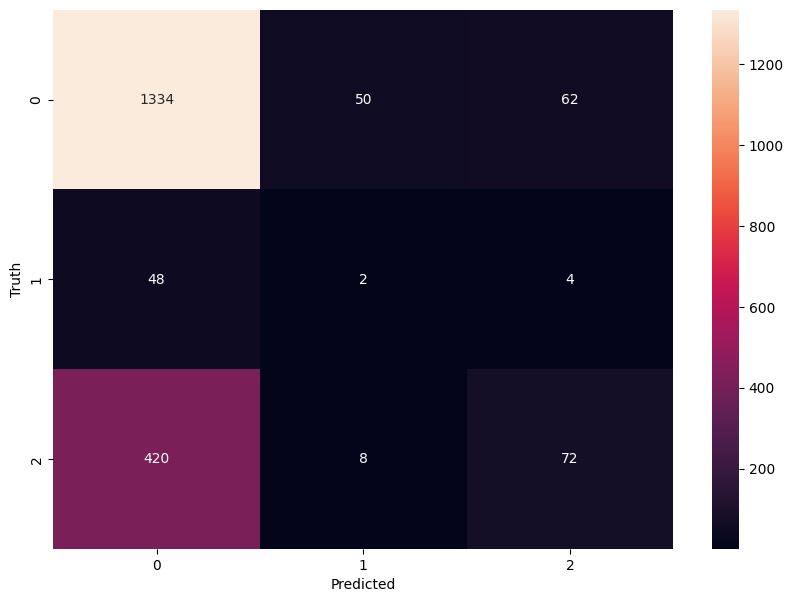

Train:
              precision    recall  f1-score   support

           0       0.88      0.92      0.90      6978
           1       0.02      0.05      0.03       129
           2       0.30      0.16      0.21       893

    accuracy                           0.82      8000
   macro avg       0.40      0.37      0.38      8000
weighted avg       0.80      0.82      0.81      8000

Predicted     0    1    2
Actual                   
0          6391  267  320
1           114    6    9
2           732   21  140


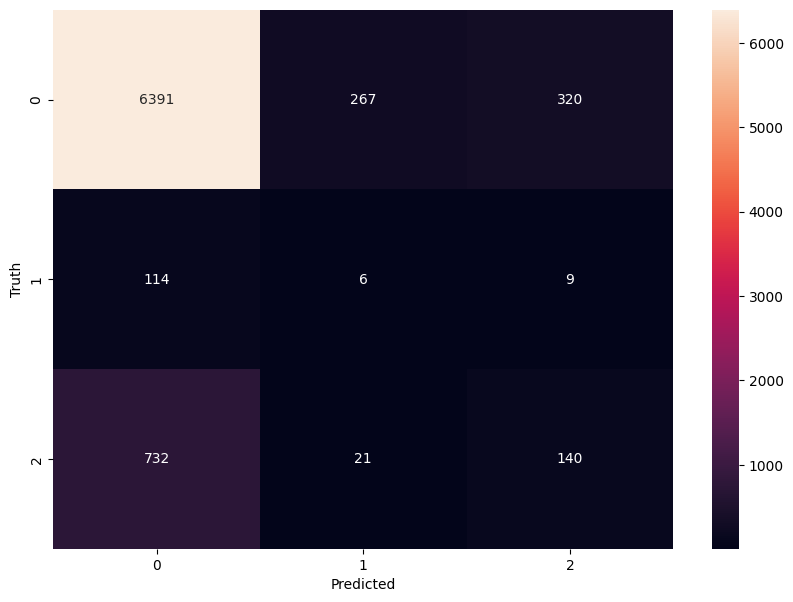

FULL
              precision    recall  f1-score   support

           0       0.85      0.92      0.89      8424
           1       0.02      0.03      0.02       183
           2       0.33      0.14      0.20      1393

    accuracy                           0.80     10000
   macro avg       0.40      0.36      0.37     10000
weighted avg       0.77      0.80      0.77     10000

Predicted     0    1    2
Actual                   
0          7748  279  397
1           165    5   13
2          1158   34  201


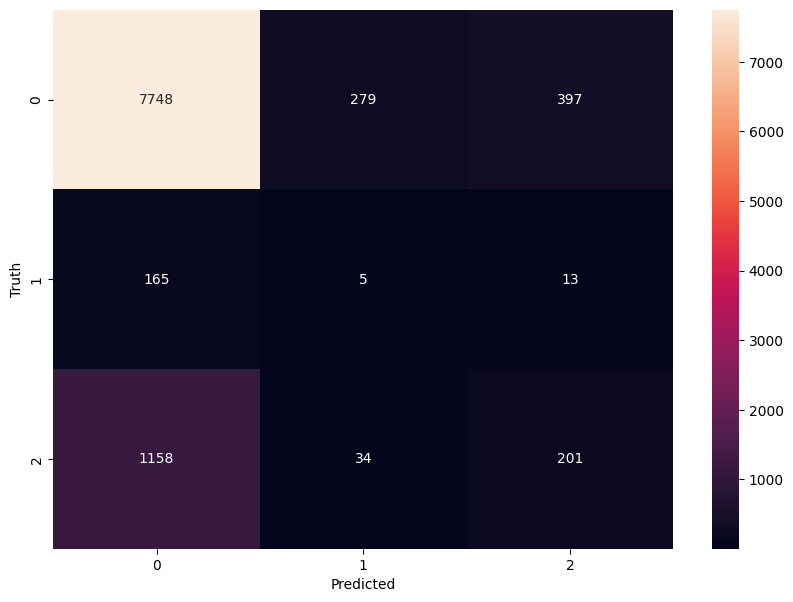

In [501]:
BATCH_SIZE = 512
HIDDEN_UNITS = 128
EPOCHS_NO = 10

optimize_args = {'mode': 'SGD', 'lr': .001}

net = FeedForwardNetwork([Linear(54, HIDDEN_UNITS),
                          ReLU(),
                          Linear(HIDDEN_UNITS,3 )])
cost_function = CrossEntropy()

list_of_losses = []
list_of_accuracies = []
for epoch in range(EPOCHS_NO):
    for b_no, idx in enumerate(range(0, len(X_test_encoded), BATCH_SIZE)):
        # 1. Pregatim urmatorul batch
        x = np.array(X_train_encoded[idx:idx + BATCH_SIZE])
        t = np.array(y_train_encoded[idx:idx + BATCH_SIZE])
        y = net.forward(x)
        loss = cost_function.forward(y, t)
        dy = cost_function.backward(y, t)
        net.backward(dy)

       #3. Actualizam parametrii retelei
        net.update(**optimize_args)

        print(f'\rEpoch {epoch + 1:02d} '
              f'| Batch {b_no:03d} '
              f'| Train NLL: {loss:6.3f} '
              f'| Train Acc: {accuracy(y, t) * 100:6.2f}% ', end='')

    y = np.array(net.forward(X_test_encoded, train=False))
    test_nll = cost_function.forward(y, y_test_encoded)
    print(f'| Test NLL: {test_nll:6.3f} '
          f'| Test Acc: {accuracy(y, y_test_encoded) * 100:3.2f}%')

# print(classification_report(y_test_encoded, np.argmax(y, axis=1),zero_division=1))
# plot_confusion_matrix(np.argmax(y, axis=1), y_test_encoded)
# print("Train:")
# y_train_pred = np.array(net.forward(X_train_encoded,train=False))
# print(classification_report(y_train_encoded, np.argmax(y_train_pred, axis=1),zero_division=1))
# plot_confusion_matrix(np.argmax(y_train_pred, axis=1), y_train_encoded)
# print("FULL")
# y_full_pred = np.array(net.forward(X_full_encoded,train=False))
# print(classification_report(y_Full, np.argmax(y_full_pred, axis=1),zero_division=1))
# plot_confusion_matrix(np.argmax(y_full_pred, axis=1), y_Full)



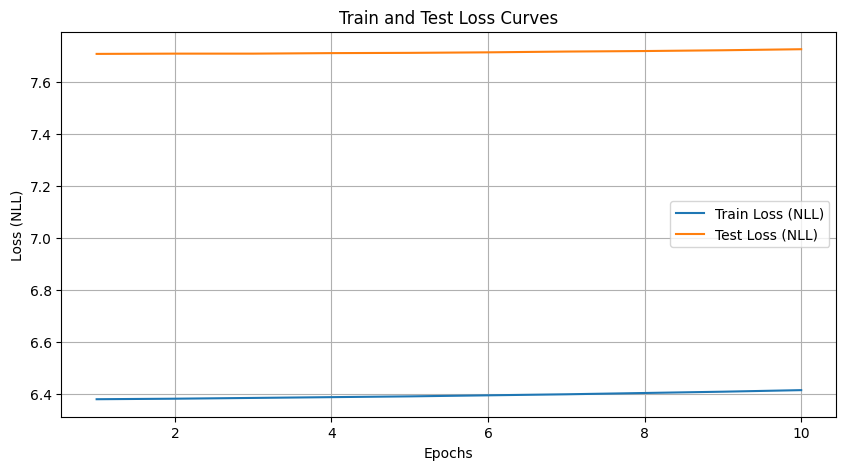

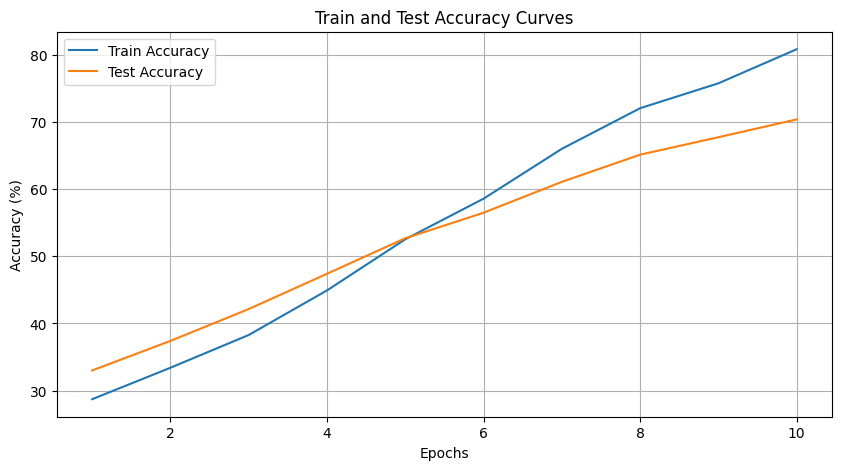

In [504]:

epochs = np.arange(1, 11)
train_nll = [6.379, 6.381, 6.384, 6.387, 6.390, 6.394, 6.398, 6.403, 6.408, 6.414]
train_acc = [28.71, 33.40, 38.28, 44.92, 52.54, 58.59, 66.02, 72.07, 75.78, 80.86]
test_nll = [7.709, 7.710, 7.710, 7.712, 7.713, 7.715, 7.718, 7.720, 7.723, 7.727]
test_acc = [33.00, 37.40, 42.15, 47.40, 52.70, 56.50, 61.10, 65.15, 67.75, 70.40]

plt.figure(figsize=(10, 5))
plt.plot(epochs, train_nll, label='Train Loss (NLL)')
plt.plot(epochs, test_nll, label='Test Loss (NLL)')
plt.xlabel('Epochs')
plt.ylabel('Loss (NLL)')
plt.title('Train and Test Loss Curves')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(epochs, train_acc, label='Train Accuracy')
plt.plot(epochs, test_acc, label='Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.title('Train and Test Accuracy Curves')
plt.legend()
plt.grid(True)
plt.show()